In [4]:
import os 
import re
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
import numpy as np

import pandas as pd
from src.astroML.datasets.tools.download import download_with_progress_bar

import astroquery
from astroquery.sdss import SDSS
from astropy.table import Table
from astropy.io import fits

In [2]:
nonbal_qso_samp_path = '../data/nonbal_qso_samp.csv'
nonbal_qso_samp_df = pd.read_csv(nonbal_qso_samp_path, index_col=0)

In [3]:
nonbal_qso_samp_df.iloc[[0]]

,SDSS_NAME,RA,DEC,PLATE,MJD,FIBERID,AUTOCLASS_PQN,Z,BAL_PROB,BI_CIV,AI_CIV
0,111438.82+360548.1,168.661785,36.09672,4622,55629,228,QSO,2.468,0.0,0.0,0.0


In [14]:
hdul = SDSS.get_spectra(plate = nonbal_qso_samp_df.iloc[[0]].PLATE,
                mjd = nonbal_qso_samp_df.iloc[[0]].MJD,
                fiberID = nonbal_qso_samp_df.iloc[[0]].FIBERID)[0]

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astroquery/sdss/core.py:1038: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s_fields = ['s.%s=%d' % (key, val) for (key, val) in
/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [18]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'SDSS 2.5-M'         / Sloan Digital Sky Survey                       
FLAVOR  = 'science '           / exposure type, SDSS spectro style              
BOSSVER = '2       '           / ICC version                                    
MJD     =                55629 / APO fMJD day at start of exposure              
MJDLIST = '55626 55627 55629'  /                                                
NAME    = '4622-55624-01'      / The name of the currently loaded plate         
PLATEID =                 4622 / The currently loaded plate                     
TILEID  =                11799 /Cartridge used in this plugging                 
CARTID  =                   

In [20]:
hdul[0].header['COEFF0']

3.5505

In [56]:
hdul['SPZLINE'].data

FITS_rec([(4622, 55629, 228, 'Ly_alpha', 1215.67      , 2.4664145,  0.00144839, 1314.2661,  1.3758064e+02,  77.38179  ,   9.512608 , 109.931984 , -4.      , 0.70390606,  0.21552546,  57,  58, 112.  , 188.92656 ),
          (4622, 55629, 228, 'N_V 1240', 1240.81      , 2.4579136,  0.00226528, 6332.728 ,  2.5962625e+03, 144.65036  , 109.59191  , 255.68974  , 85.83075 , 0.5657261 ,  0.23870811, 228, 161, 386.8 , 438.41583 ),
          (4622, 55629, 228, 'C_IV 1549', 1549.48      , 2.4579136,  0.00226528, 1855.6329,  2.1936215e+02,  56.532074 ,   7.4149766,  92.81075  ,  7.728114, 0.60911125,  0.02917437,  81,  80, 159.55, 137.00488 ),
          (4622, 55629, 228, 'He_II 1640', 1640.42      , 2.4579153,  0.00226528, 1855.6329,  2.1936215e+02,  -2.3423796,   6.758476 ,  -3.9211156, 11.507539, 0.5973758 ,  0.02954496,  69,  81, 148.55, 102.708305),
          (4622, 55629, 228, 'C_III] 1908', 1908.734     , 2.4579124,  0.00226528, 1855.6329,  2.1936215e+02,  27.373379 ,   6.109654 ,  64.90698

In [58]:
hdul['SPALL'].data

FITS_rec([('boss', 'boss15', 'good', 7.91473, 7.91473, 0, 0, 4000., 1, 0., 35.150444, -122.4261, 2199023403008, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 663754, 1, [1.2612141, 1.9777905, 2.206943 , 2.4684381, 3.0700564], [ 20.832905 , 101.08689  ,  41.37589  ,  19.072575 ,   1.2473499], 4622, 11799, 55629, 228, 'v5_10_0', 'v5_10_0', 'QSO', 168.66177, 36.096725, 'QSO', '', 2.4666247, 0.00141391, 0.9107221, 4529, 0.03435659, 'spEigenQSO-55732.fits', [ 0,  1,  2,  3, -1, -1, -1, -1, -1, -1], 3, [ 1.1084108e-04, -2.7035380e-04,  1.5567026e-04,  3.2075486e-04, -1.0143099e+00,  3.5719140e+00, -2.6546509e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00], 0., 0., 0., 0., 0., 0., 0, 3601.6375, 10327.614, 0.4536, 0, [0.5085959, 1.6658055, 1.2785258, 1.1179057, 1.0034504], 1.2487272, 0.9000687, [0.27076843, 0.03634476, 0.00155763, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ], [0.13681205, 0.01765317, 0.00025961, 0.        , 0.        , 0.        , 0.        , 0.    

In [53]:
np.array(hdul['SPZLINE'].data['LINENAME'])

array(['Ly_alpha', 'N_V 1240', 'C_IV 1549', 'He_II 1640', 'C_III] 1908',
       'Mg_II 2799', '[O_II] 3725', '[O_II] 3727', '[Ne_III] 3868',
       'H_zeta', '[Ne_III] 3970', 'H_epsilon', 'H_delta', 'H_gamma',
       '[O_III] 4363', 'He_II 4685', 'H_beta', '[O_III] 4959',
       '[O_III] 5007', 'He_II 5411', '[O_I] 5577', '[N_II] 5755',
       'He_I 5876', '[O_I] 6300', '[S_III] 6312', '[O_I] 6363',
       '[N_II] 6548', 'H_alpha', '[N_II] 6583', '[S_II] 6716',
       '[S_II] 6730', '[Ar_III] 7135'], dtype='<U13')

In [51]:
hdul['SPZLINE'].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   89 / length of dimension 1                          
NAXIS2  =                   32 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   19 / number of table fields                         
TTYPE1  = 'PLATE   '                                                            
TFORM1  = 'J       '                                                            
TTYPE2  = 'MJD     '                                                            
TFORM2  = 'J       '                                                            
TTYPE3  = 'FIBERID '        

In [40]:
data

FITS_rec([(38.15033  , 3.5505, 0.00691883, 0, 71303168, 1.4072158 , 10.372871 , 1.0713236 ),
          (16.270061 , 3.5506, 0.00576148, 0, 71303168, 1.4064875 , 10.442717 , 1.0418059 ),
          (-3.9221218, 3.5507, 0.01223144, 0, 71303168, 1.3712417 , 11.495762 , 1.0294936 ),
          ...,
          ( 2.1791081, 4.0138, 0.2541133 , 0,   589824, 0.8625338 ,  2.5365317, 0.33018214),
          ( 1.591968 , 4.0139, 0.22518517, 0,        0, 0.86263466,  5.4728675, 0.3341906 ),
          ( 2.1339898, 4.014 , 0.23079844, 0,        0, 0.8625221 ,  7.811224 , 0.33119872)],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

In [45]:
import numpy as np
np.sqrt(4)

2.0

(array([3030.,  404.,  662.,  470.,   35.,   10.,    0.,    0.,   16.,
           9.]),
 array([0.00000000e+00, 2.47857152e+07, 4.95714304e+07, 7.43571456e+07,
        9.91428608e+07, 1.23928576e+08, 1.48714291e+08, 1.73500006e+08,
        1.98285722e+08, 2.23071437e+08, 2.47857152e+08]),
 <BarContainer object of 10 artists>)

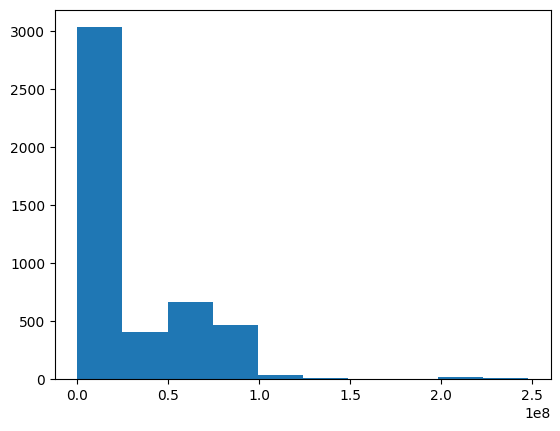

In [48]:
plt.hist(data['or_mask'])

In [ ]:
download_url = 'https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/full/6255/spec-6255-56240-0001.fits'



buffer = download_with_progress_bar(download_url, return_buffer=True)

In [61]:
import sys
from urllib.error import HTTPError
import numpy as np
from astroML.datasets import fetch_sdss_spectrum
from astroML.datasets.tools import query_plate_mjd_fiber, TARGET_GALAXY
from astroML.dimensionality import iterative_pca

from src.astroML.datasets.tools.sdss_fits import SDSSfits,
from src.astroML.datasets.tools.download import f

In [ ]:
SDSSfits()

In [ ]:
# First query for the list of spectra to download
# plate, mjd, fiber = query_plate_mjd_fiber(n_spectra, primtarget,
#                                             zlim[0], zlim[1])

# primtarget=TARGET_GALAXY,
# zlim=(0, 0.7),
n
loglam_start=3.5,
loglam_end=3.9,
Nlam=1000


plate = nonbal_qso_samp_df.iloc[[0]].PLATE,
mjd = nonbal_qso_samp_df.iloc[[0]].MJD,
fiberID = nonbal_qso_samp_df.iloc[[0]].FIBERID

# Set up arrays to hold information gathered from the spectra
spec_cln = np.zeros(n_spectra, dtype=np.int32)
lineindex_cln = np.zeros(n_spectra, dtype=np.int32)

log_NII_Ha = np.zeros(n_spectra, dtype=np.float32)
log_OIII_Hb = np.zeros(n_spectra, dtype=np.float32)

z = np.zeros(n_spectra, dtype=np.float32)
zerr = np.zeros(n_spectra, dtype=np.float32)
spectra = np.zeros((n_spectra, Nlam), dtype=np.float32)
mask = np.zeros((n_spectra, Nlam), dtype=bool)

# Calculate new wavelength coefficients
new_coeff0 = loglam_start
new_coeff1 = (loglam_end - loglam_start) / Nlam

# Now download all the needed spectra, and resample to a common
#  wavelength bin.
n_spectra = len(plate)
num_skipped = 0
i = 0

while i < n_spectra:
    sys.stdout.write(' %i / %i spectra\r' % (i + 1, n_spectra))
    sys.stdout.flush()
    try:
        spec = fetch_sdss_spectrum(plate[i], mjd[i], fiber[i])
    except HTTPError:
        num_skipped += 1
        print("%i, %i, %i not found" % (plate[i], mjd[i], fiber[i]))
        i += 1
        continue

    spec_rebin = spec.restframe().rebin(new_coeff0, new_coeff1, Nlam)

    if np.all(spec_rebin.spectrum == 0):
        num_skipped += 1
        print("%i, %i, %i is all zero" % (plate[i], mjd[i], fiber[i]))
        i += 1
        continue

    spec_cln[i] = spec.spec_cln

    lineindex_cln[i], (log_NII_Ha[i], log_OIII_Hb[i])\
        = spec.lineratio_index()

    z[i] = spec.z
    zerr[i] = spec.zerr

    spectra[i] = spec_rebin.spectrum
    mask[i] = spec_rebin.compute_mask(0.5, 5)

    i += 1
sys.stdout.write('\n')

N = i
print("   %i spectra skipped" % num_skipped)
print("   %i spectra processed" % N)
print("saving to %s" % outfile)

In [ ]:
import sys
from urllib.error import HTTPError
import numpy as np
from astroML.datasets import fetch_sdss_spectrum
from astroML.datasets.tools import query_plate_mjd_fiber, TARGET_GALAXY
from astroML.dimensionality import iterative_pca


def fetch_and_shift_spectra(n_spectra,
                            outfile,
                            primtarget=TARGET_GALAXY,
                            zlim=(0, 0.7),
                            loglam_start=3.5,
                            loglam_end=3.9,
                            Nlam=1000):
    """
    This function queries CAS for matching spectra, and then downloads
    them and shifts them to a common redshift binning
    """
    # First query for the list of spectra to download
    plate, mjd, fiber = query_plate_mjd_fiber(n_spectra, primtarget,
                                              zlim[0], zlim[1])

    # Set up arrays to hold information gathered from the spectra
    spec_cln = np.zeros(n_spectra, dtype=np.int32)
    lineindex_cln = np.zeros(n_spectra, dtype=np.int32)

    log_NII_Ha = np.zeros(n_spectra, dtype=np.float32)
    log_OIII_Hb = np.zeros(n_spectra, dtype=np.float32)

    z = np.zeros(n_spectra, dtype=np.float32)
    zerr = np.zeros(n_spectra, dtype=np.float32)
    spectra = np.zeros((n_spectra, Nlam), dtype=np.float32)
    mask = np.zeros((n_spectra, Nlam), dtype=bool)

    # Calculate new wavelength coefficients
    new_coeff0 = loglam_start
    new_coeff1 = (loglam_end - loglam_start) / Nlam

    # Now download all the needed spectra, and resample to a common
    #  wavelength bin.
    n_spectra = len(plate)
    num_skipped = 0
    i = 0

    while i < n_spectra:
        sys.stdout.write(' %i / %i spectra\r' % (i + 1, n_spectra))
        sys.stdout.flush()
        try:
            spec = fetch_sdss_spectrum(plate[i], mjd[i], fiber[i])
        except HTTPError:
            num_skipped += 1
            print("%i, %i, %i not found" % (plate[i], mjd[i], fiber[i]))
            i += 1
            continue

        spec_rebin = spec.restframe().rebin(new_coeff0, new_coeff1, Nlam)

        if np.all(spec_rebin.spectrum == 0):
            num_skipped += 1
            print("%i, %i, %i is all zero" % (plate[i], mjd[i], fiber[i]))
            i += 1
            continue

        spec_cln[i] = spec.spec_cln

        lineindex_cln[i], (log_NII_Ha[i], log_OIII_Hb[i])\
            = spec.lineratio_index()

        z[i] = spec.z
        zerr[i] = spec.zerr

        spectra[i] = spec_rebin.spectrum
        mask[i] = spec_rebin.compute_mask(0.5, 5)

        i += 1
    sys.stdout.write('\n')

    N = i
    print("   %i spectra skipped" % num_skipped)
    print("   %i spectra processed" % N)
    print("saving to %s" % outfile)

    np.savez(outfile,
             spectra=spectra[:N],
             mask=mask[:N],
             coeff0=new_coeff0,
             coeff1=new_coeff1,
             spec_cln=spec_cln[:N],
             lineindex_cln=lineindex_cln[:N],
             log_NII_Ha=log_NII_Ha[:N],
             log_OIII_Hb=log_OIII_Hb[:N],
             z=z[:N],
             zerr=zerr[:N])
